In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from scipy.stats import entropy
import seaborn as sns

In [3]:
df = pd.read_csv("q1.csv")

In [4]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
df.shape #(num_records, num_variables)

(27820, 12)

In [6]:
# inbuilt methods cant handle conversion of comma format string to float
df[" gdp_for_year ($) "] = df[" gdp_for_year ($) "].apply(lambda s : int(s.replace(',', '')))

In [7]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)       int64
gdp_per_capita ($)      int64
generation             object
dtype: object

In [8]:
for col in df.columns:
  print(col, ": ", len(df[col].unique()))

country :  101
year :  32
sex :  2
age :  6
suicides_no :  2084
population :  25564
suicides/100k pop :  5298
country-year :  2321
HDI for year :  306
 gdp_for_year ($)  :  2321
gdp_per_capita ($) :  2233
generation :  6


In [9]:
print("country: categorical")
print("year: temporal")
print("sex: categorical")
print("age: ordinal")
print("suicides_no: integer")
print("suicides/100k pop: continuous")
print("population: integer")
print("country-year: categorical")
print("HDI for year: continuous")
print("gdp_for_year and gdp_per_capita: integer")
print("generation: ordinal")

country: categorical
year: temporal
sex: categorical
age: ordinal
suicides_no: integer
suicides/100k pop: continuous
population: integer
country-year: categorical
HDI for year: continuous
gdp_for_year and gdp_per_capita: integer
generation: ordinal


In [10]:
# printing num_missing_entries
num_no_missing=0
for col in df.columns:
  print(col, ": ", df[col].isnull().sum())
  if np.sum(df[col].isnull())==0:
    num_no_missing+=1

country :  0
year :  0
sex :  0
age :  0
suicides_no :  0
population :  0
suicides/100k pop :  0
country-year :  0
HDI for year :  19456
 gdp_for_year ($)  :  0
gdp_per_capita ($) :  0
generation :  0


In [11]:
# num_cols with no missing data
print(num_no_missing)

11


In [12]:
df.drop(["country-year"], axis=1, inplace=True) # dropping redundant column

In [13]:
# manually categorizing vars
discrete_vars=["country", "year", "sex", "age", "generation"]

country


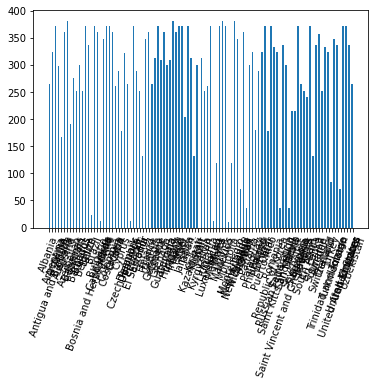

year


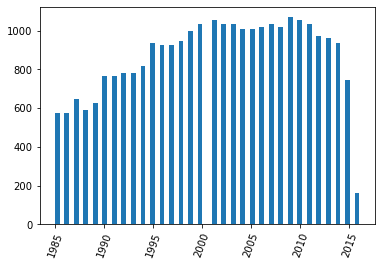

sex


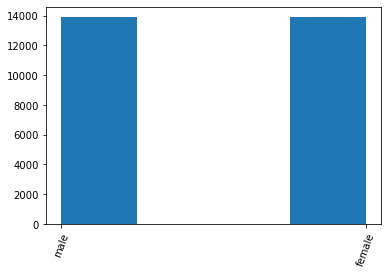

age


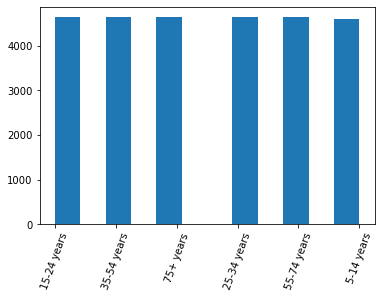

generation


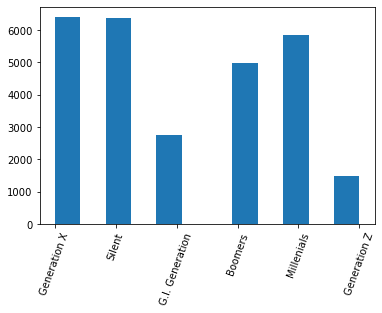

In [14]:
for col in discrete_vars:
    plt.hist(df[col], bins=len(df[col].unique())*2)
    plt.xticks(rotation="70")
    print(col)
    plt.show()

In [15]:
# modes printed in form: [mode_values], count
for col in discrete_vars:
    vals, counts = np.unique(df[col], return_counts=True)
    max_count = np.max(counts)
    print(col)
    print(vals[counts==max_count], max_count)
    print()

country
['Austria' 'Iceland' 'Mauritius' 'Netherlands'] 382

year
[2009] 1068

sex
['female' 'male'] 13910

age
['15-24 years' '25-34 years' '35-54 years' '55-74 years' '75+ years'] 4642

generation
['Generation X'] 6408



In [16]:
for col in discrete_vars:
    value,counts = np.unique(df[col], return_counts=True)
    print(col, entropy(counts))

country 4.512115046503916
year 3.4329561237563206
sex 0.6931471805599453
age 1.7917561564428144
generation 1.6954491876355222


In [17]:
# sex has relatively less diversity
# this may be due to there being only two possible outcomes

In [18]:
#dropping redundant columns
df.drop(["HDI for year"], axis=1, inplace=True)

In [19]:
# manually categorizing vars
continuous_vars=["suicides_no", "population", "suicides/100k pop", " gdp_for_year ($) ", "gdp_per_capita ($)"]

In [20]:
# mean, std, min, first quartile, median, third quartile, max
print(df[continuous_vars].describe())

        suicides_no    population  suicides/100k pop   gdp_for_year ($)   \
count  27820.000000  2.782000e+04       27820.000000        2.782000e+04   
mean     242.574407  1.844794e+06          12.816097        4.455810e+11   
std      902.047917  3.911779e+06          18.961511        1.453610e+12   
min        0.000000  2.780000e+02           0.000000        4.691962e+07   
25%        3.000000  9.749850e+04           0.920000        8.985353e+09   
50%       25.000000  4.301500e+05           5.990000        4.811469e+10   
75%      131.000000  1.486143e+06          16.620000        2.602024e+11   
max    22338.000000  4.380521e+07         224.970000        1.812071e+13   

       gdp_per_capita ($)  
count        27820.000000  
mean         16866.464414  
std          18887.576472  
min            251.000000  
25%           3447.000000  
50%           9372.000000  
75%          24874.000000  
max         126352.000000  


In [21]:
# variance
print(df[continuous_vars].var())

suicides_no           8.136904e+05
population            1.530202e+13
suicides/100k pop     3.595389e+02
 gdp_for_year ($)     2.112982e+24
gdp_per_capita ($)    3.567405e+08
dtype: float64


In [22]:
# interquartile range
print(df[continuous_vars].quantile(0.75)-df[continuous_vars].quantile(0.25))

suicides_no           1.280000e+02
population            1.388645e+06
suicides/100k pop     1.570000e+01
 gdp_for_year ($)     2.512171e+11
gdp_per_capita ($)    2.142700e+04
dtype: float64


In [23]:
# skew
print(df[continuous_vars].skew())

suicides_no           10.352910
population             4.459414
suicides/100k pop      2.963414
 gdp_for_year ($)      7.233755
gdp_per_capita ($)     1.963470
dtype: float64


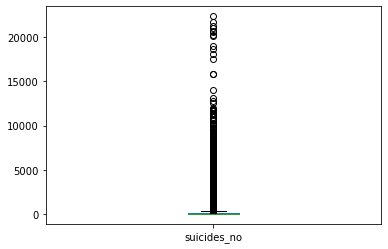

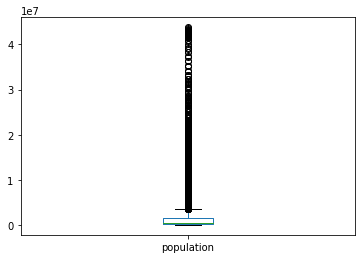

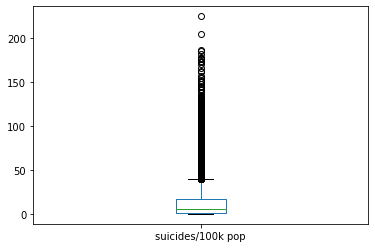

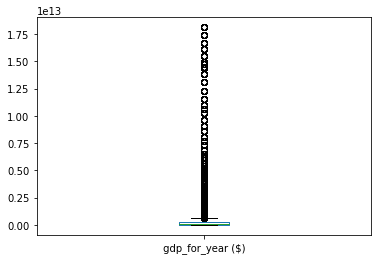

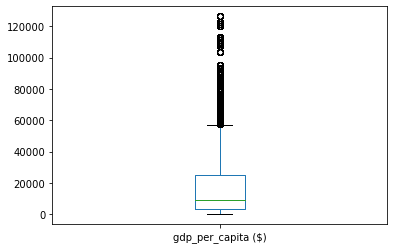

In [24]:
# box and whisker plot
for col in continuous_vars:
    df[col].plot.box()
    plt.show()

suicides_no


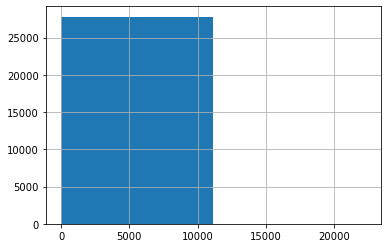

population


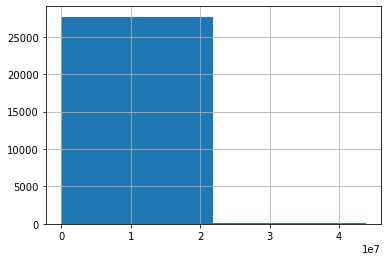

suicides/100k pop


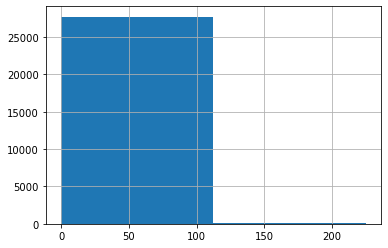

 gdp_for_year ($) 


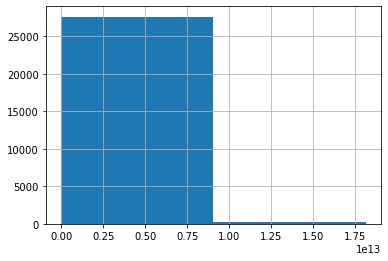

gdp_per_capita ($)


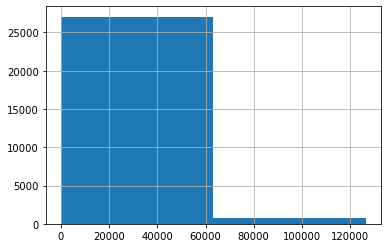

In [25]:
# histogram too few bins
for col in continuous_vars:
    df[col].hist(bins=2)
    print(col)
    plt.show()

suicides_no


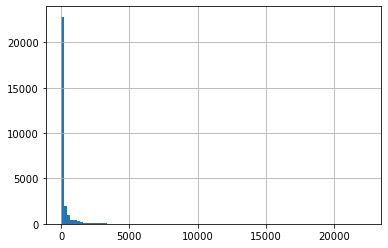

population


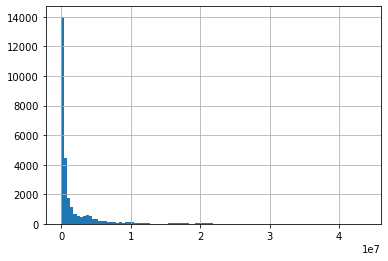

suicides/100k pop


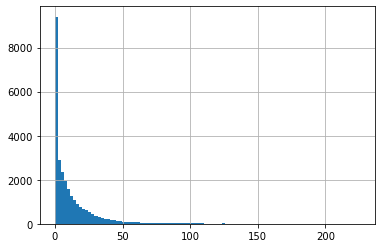

 gdp_for_year ($) 


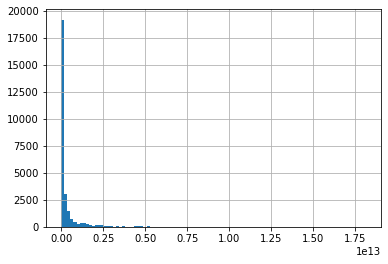

gdp_per_capita ($)


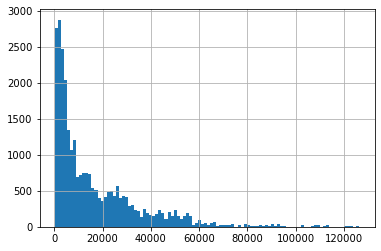

In [26]:
# histogram too many bins
for col in continuous_vars:
    df[col].hist(bins=100)
    print(col)
    plt.show()

suicides_no


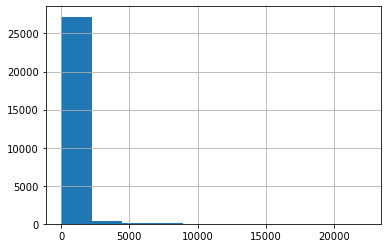

population


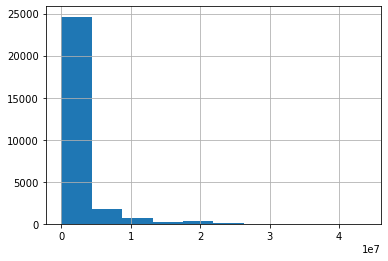

suicides/100k pop


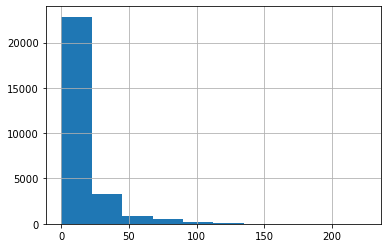

 gdp_for_year ($) 


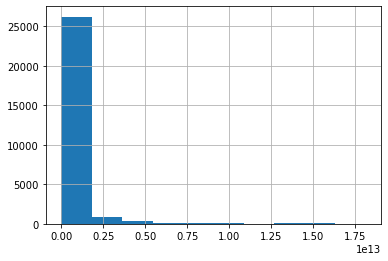

gdp_per_capita ($)


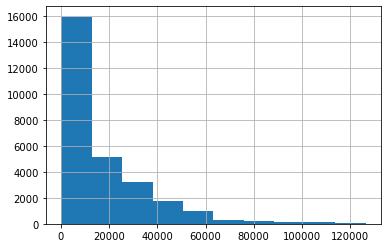

In [27]:
# histogram sufficient bins
for col in continuous_vars:
    df[col].hist(bins=10)
    print(col)
    plt.show()

suicides_no


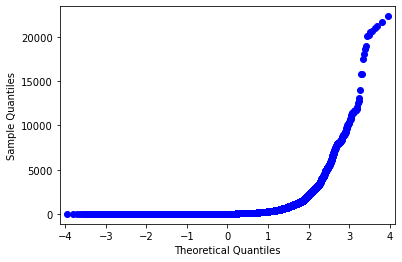

population


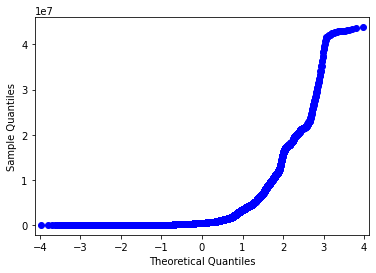

suicides/100k pop


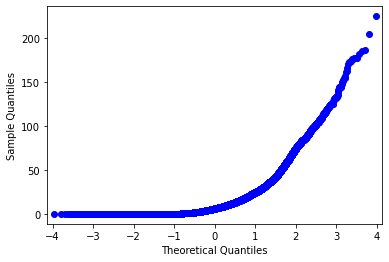

 gdp_for_year ($) 


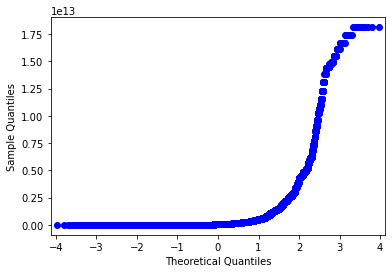

gdp_per_capita ($)


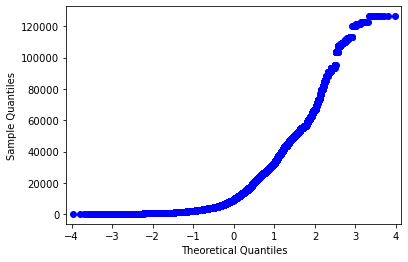

In [28]:
import statsmodels.api as sm

for col in continuous_vars:
    print(col)
    fig = sm.qqplot(df[col].dropna())
    plt.show()

In [29]:
# all variables are right skewed

suicides_no


C:\Users\drbha\AppData\Roaming\Python\Python38\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


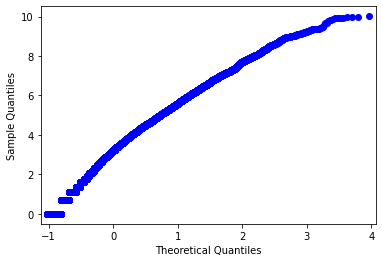

population


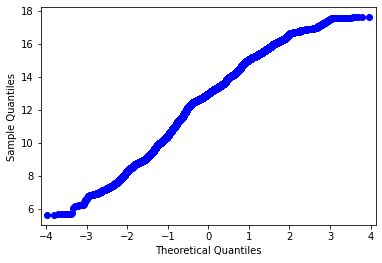

suicides/100k pop


C:\Users\drbha\AppData\Roaming\Python\Python38\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


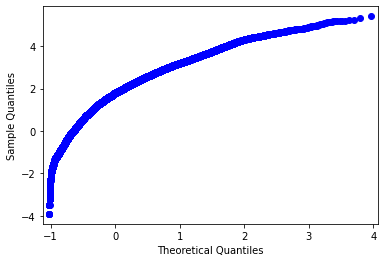

 gdp_for_year ($) 


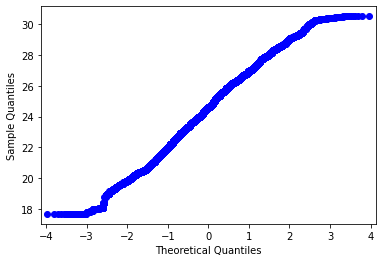

gdp_per_capita ($)


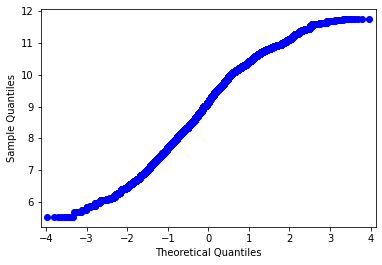

In [30]:
for col in continuous_vars:
    print(col)
    fig = sm.qqplot(np.log(df[col].dropna()))
    plt.show()

In [31]:
# all variables except suicides/100k pop are log-normal

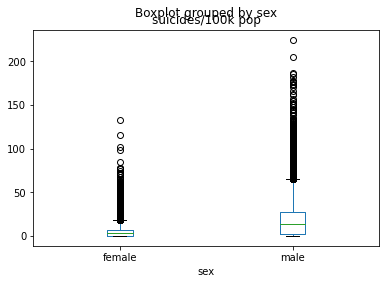

In [32]:
# suicides/100k pop plotted against sex
df.boxplot(by='sex', column='suicides/100k pop',grid=False)

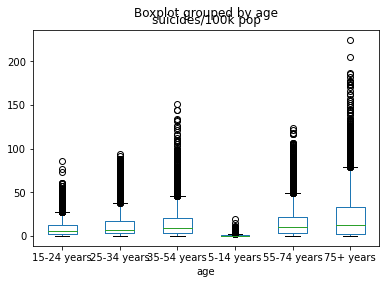

In [33]:
# suicides/100k pop plotted against age
df.boxplot(by='age', column='suicides/100k pop',grid=False)

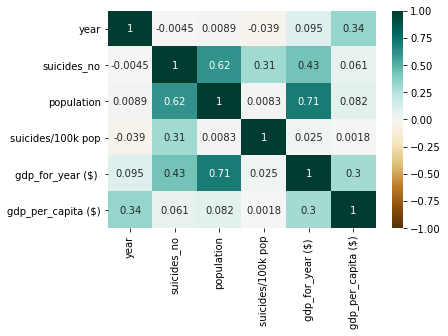

In [34]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='BrBG')
plt.show()

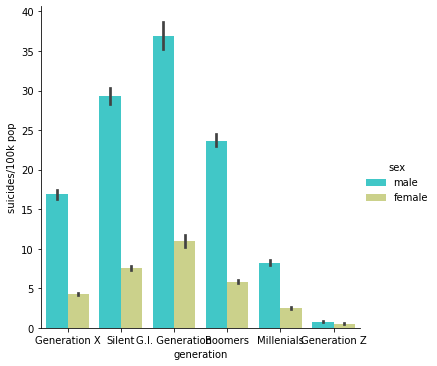

In [35]:
# comparing male and female suicide rates, over various generation categories
sns.catplot(x="generation", y="suicides/100k pop", hue="sex", kind = 'bar', data=df, palette = "rainbow")

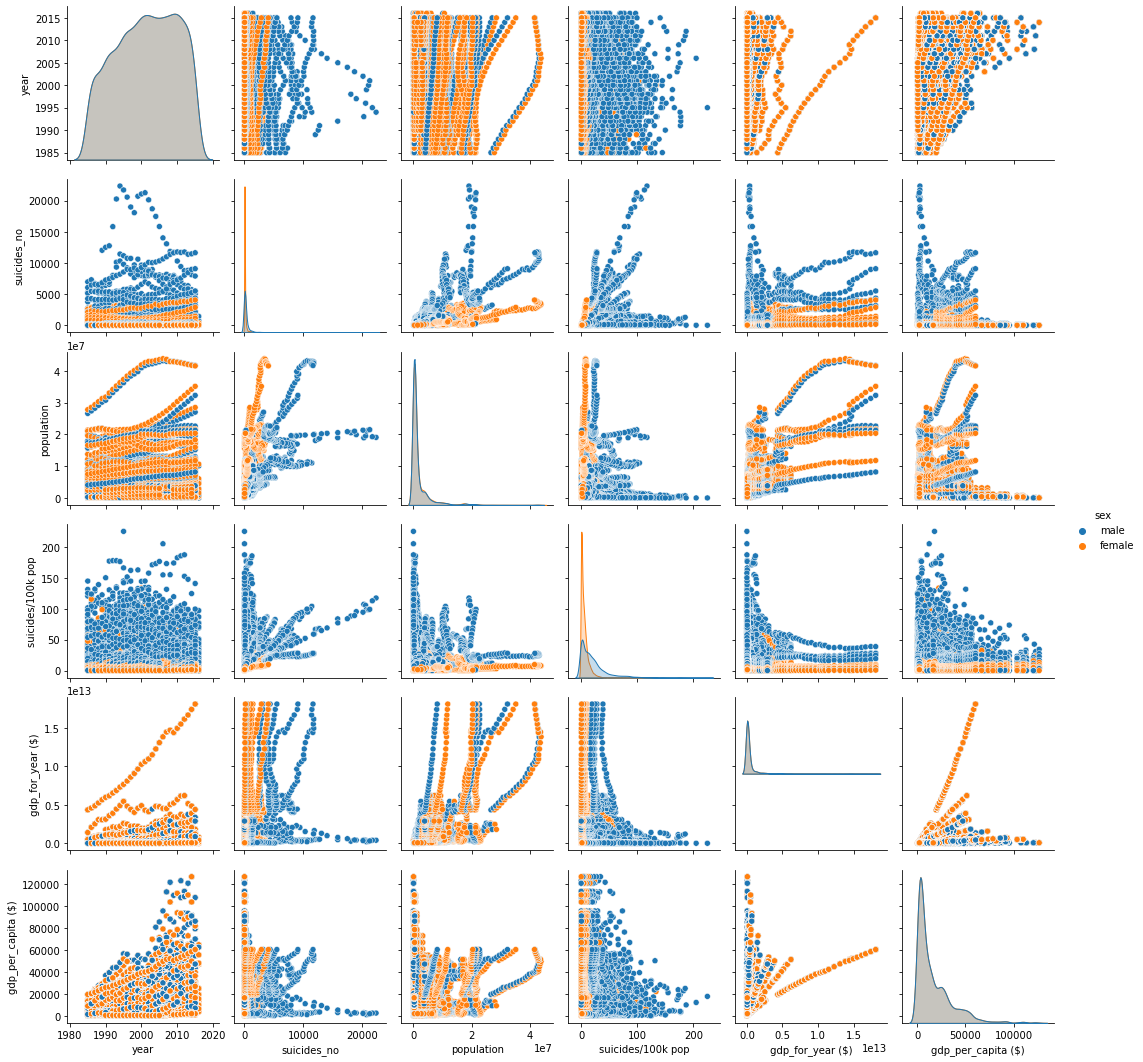

In [36]:
# comparing every variable to every other variable, for different genders
sns.pairplot(df, hue="sex")

In [37]:
# example:
# for lower gdp_per_capita, there is higher suicide_rate
# and males are more affected by this than females